In [1]:
# final model here

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [3]:
import os.path
import sys

path = r"C:\Users\Berkay\Desktop\This Year\ML\handson-ml-master\datasets\housing\housing.csv"
data = pd.read_csv(path)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data[["ocean_proximity"]].value_counts()

ocean_proximity
<1H OCEAN          9136
INLAND             6551
NEAR OCEAN         2658
NEAR BAY           2290
ISLAND                5
dtype: int64

In [7]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

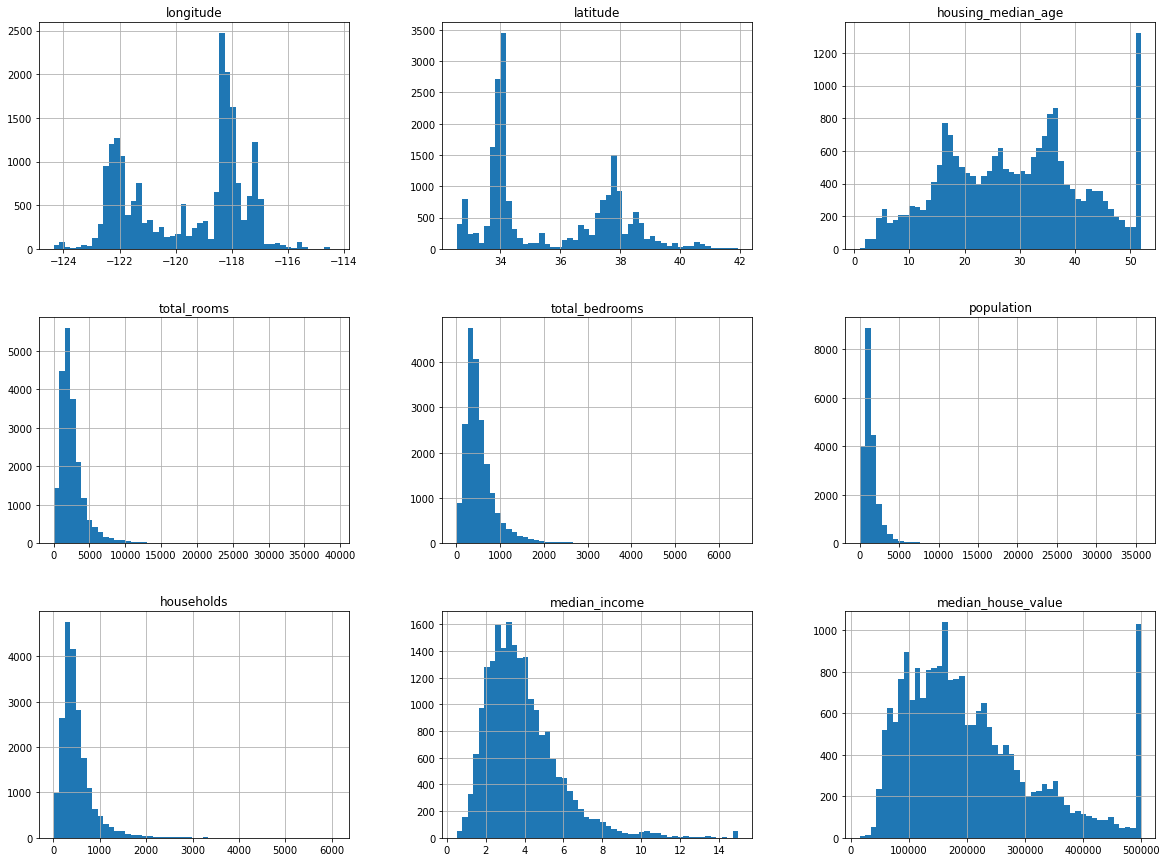

In [8]:
data.hist(bins=51,figsize=(20,15))

array([[<AxesSubplot:title={'center':'median_house_value'}>,
        <AxesSubplot:title={'center':'median_income'}>]], dtype=object)

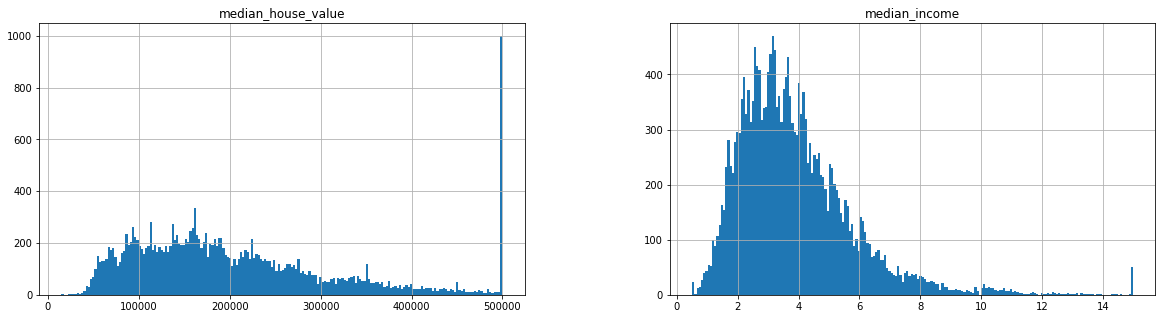

In [9]:
data[["median_house_value","median_income"]].hist(bins=200,figsize=(20,5))

In [10]:
data[["median_house_value"]].sort_values(by="median_house_value",ascending=False).value_counts().sort_index(ascending=False)

median_house_value
500001.0              965
500000.0               27
499100.0                1
499000.0                1
498800.0                1
                     ... 
26600.0                 1
25000.0                 1
22500.0                 4
17500.0                 1
14999.0                 4
Length: 3842, dtype: int64

In [11]:
data["income_cat"] = pd.cut(data["median_income"],
                            bins = [0.,1.5,3.,4.5,6.,np.inf],
                            labels = [1,2,3,4,5])
data[["income_cat"]].value_counts()

income_cat
3             7236
2             6581
4             3639
5             2362
1              822
dtype: int64

<AxesSubplot:>

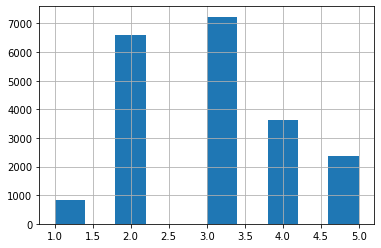

In [12]:
data["income_cat"].hist()

In [13]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(data,test_size = 0.2, random_state = 42, stratify = data["income_cat"])

In [14]:
(data["income_cat"].value_counts() / len(data)).sort_index()

1    0.039826
2    0.318847
3    0.350581
4    0.176308
5    0.114438
Name: income_cat, dtype: float64

In [15]:
(test["income_cat"].value_counts() / len(test)).sort_index()

1    0.039729
2    0.318798
3    0.350533
4    0.176357
5    0.114583
Name: income_cat, dtype: float64

In [16]:
(train["income_cat"].value_counts() / len(train)).sort_index()

1    0.039850
2    0.318859
3    0.350594
4    0.176296
5    0.114402
Name: income_cat, dtype: float64

In [17]:
train = train.copy()
test = test.copy()

In [18]:
data.drop("income_cat",axis=1,inplace=True)
test.drop("income_cat",axis=1,inplace=True)
train.drop("income_cat",axis=1,inplace=True)

In [19]:
data = train.copy()

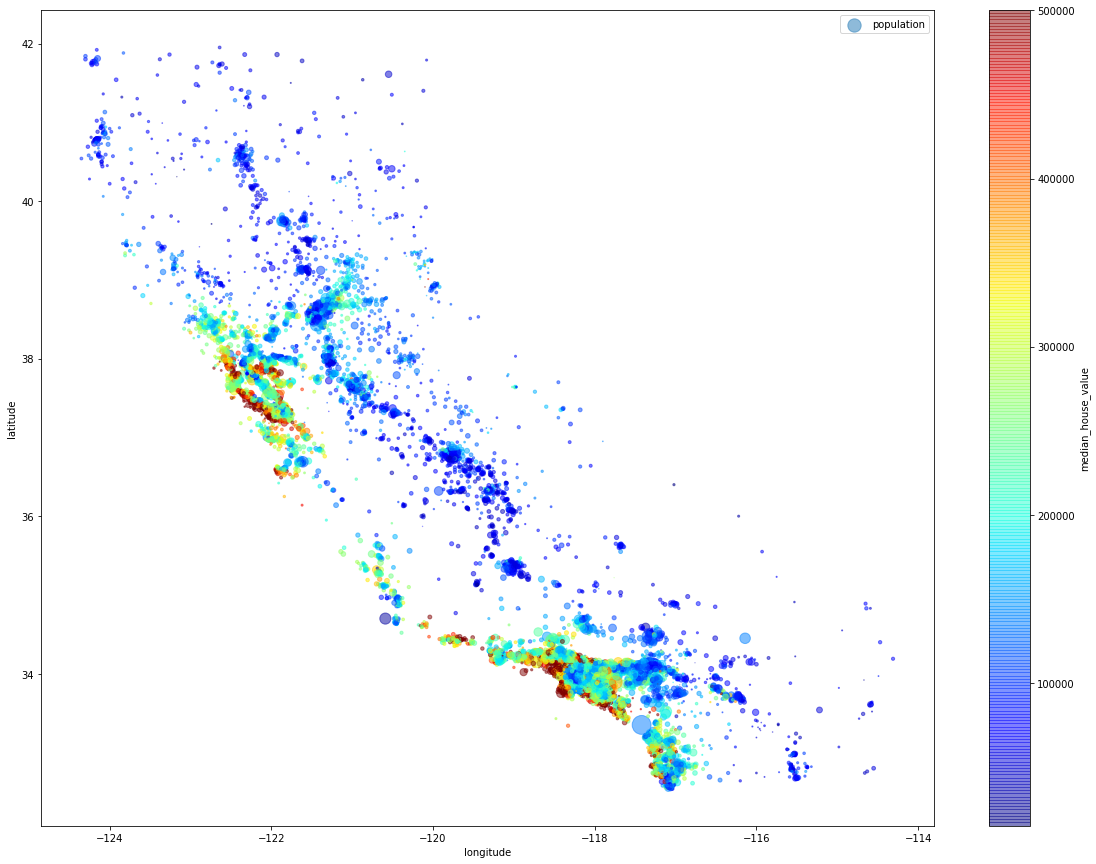

In [20]:
data.plot(kind="scatter",x="longitude",y="latitude",figsize=(20,15),alpha=0.5,sharex=False,
          s=data["population"]/100,label="population",c="median_house_value", cmap = plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [21]:
corr_matrix = data.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [22]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='latitude', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>,
        <AxesSubplot:xlabel='latitude', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='to

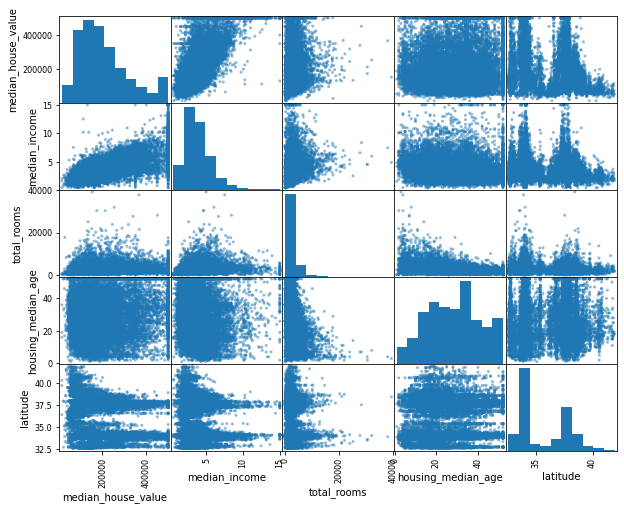

In [23]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income","total_rooms","housing_median_age","latitude"]
scatter_matrix(data[attributes],figsize=(10,8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

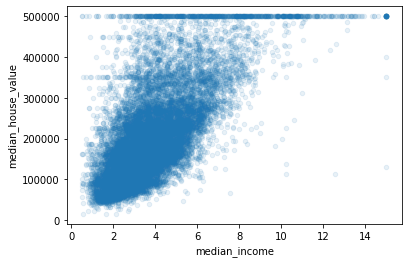

In [24]:
data.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)

In [25]:
data["rooms_per_household"] = data["total_rooms"] / data["households"]
data["bedrooms_per_room"] = data["total_bedrooms"] / data["total_rooms"]
data["population_per_household"] = data["population"] / data["households"]

In [26]:
corr_matrix = data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [27]:
data = train.drop("median_house_value",axis=1).copy()
data_labels = train["median_house_value"].copy()

In [28]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [29]:
data_num = data.drop("ocean_proximity",axis=1)

In [30]:
imputer.fit(data_num)

SimpleImputer(strategy='median')

In [31]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [32]:
X = imputer.transform(data_num)

In [33]:
X

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

In [34]:
data_tr = pd.DataFrame(X, columns=data_num.columns, index=data_num.index)

In [35]:
data_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [36]:
data_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [37]:
data_cat = data[["ocean_proximity"]]

In [38]:
data_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [39]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(data_cat)
data_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [40]:
data_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [41]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [42]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [43]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
data_extra_attribs = attr_adder.transform(data.values)

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("aatribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler()),
])


In [45]:
data_num_tr = num_pipeline.fit_transform(data_num)

In [46]:
data_num_tr.shape

(16512, 11)

In [47]:
from sklearn.compose import ColumnTransformer

num_attribs = list(data_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

In [48]:
data_prepared = full_pipeline.fit_transform(data)

In [49]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [50]:
lin_reg.fit(data_prepared, data_labels)

LinearRegression()

In [51]:
some_data = data.iloc[:5]
some_labels = data_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [52]:
print("Predictions: ", lin_reg.predict(some_data_prepared))
print("labels: ", list(some_labels))

Predictions:  [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
labels:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [53]:
from sklearn.metrics import mean_squared_error

data_predictions = lin_reg.predict(data_prepared)


In [54]:
lin_rmse = mean_squared_error(data_labels, data_predictions, squared=False)
lin_rmse

68628.19819848922

In [55]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(data_prepared, data_labels)

DecisionTreeRegressor()

In [56]:
data_predictions = tree_reg.predict(data_prepared)

In [57]:
tree_rmse = mean_squared_error(data_labels, data_predictions, squared=False)
tree_rmse

0.0

In [58]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, data_prepared, data_labels, scoring="neg_root_mean_squared_error",cv=5)

In [59]:
tree_rmse_scores = -scores
tree_rmse_scores.mean()

71640.50314687876

In [60]:
lin_scores = cross_val_score(lin_reg, data_prepared, data_labels, scoring="neg_root_mean_squared_error", cv=5)

In [61]:
lin_rmse_scores = -lin_scores
lin_rmse_scores.mean()

69112.08114978828

In [62]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

In [63]:
forest_reg.fit(data_prepared,data_labels)

RandomForestRegressor()

In [64]:
forest_score = cross_val_score(forest_reg, data_prepared, data_labels, scoring="neg_root_mean_squared_error",cv=5)

In [65]:
forest_rmse_scores = -forest_score
forest_rmse_scores.mean()

50438.03556351333

In [66]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"n_estimators":[3,10,30], "max_features":[2,4,6,8]},
    {"bootstrap":[False], "n_estimators":[3,10], "max_features":[2,3,4]},
]

forest_reg = RandomForestRegressor()

In [67]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=3, scoring = "neg_root_mean_squared_error",
                           return_train_score=True)

In [68]:
grid_search.fit(data_prepared, data_labels)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [69]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [70]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [71]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-mean_score,params)

64120.08025490097 {'max_features': 2, 'n_estimators': 3}
56528.6800919912 {'max_features': 2, 'n_estimators': 10}
53626.629202191194 {'max_features': 2, 'n_estimators': 30}
61525.94618421344 {'max_features': 4, 'n_estimators': 3}
53485.146452712164 {'max_features': 4, 'n_estimators': 10}
51297.61294097761 {'max_features': 4, 'n_estimators': 30}
58797.210285507375 {'max_features': 6, 'n_estimators': 3}
53064.21433916959 {'max_features': 6, 'n_estimators': 10}
50475.37550139043 {'max_features': 6, 'n_estimators': 30}
58669.85066577215 {'max_features': 8, 'n_estimators': 3}
52874.666506113834 {'max_features': 8, 'n_estimators': 10}
50768.61101304414 {'max_features': 8, 'n_estimators': 30}
61342.855147140996 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54437.392154424895 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60437.27544622258 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52616.75011444778 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [72]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.18378810e-02, 6.46576326e-02, 4.34906901e-02, 1.79999807e-02,
       1.65491330e-02, 1.79776351e-02, 1.68358876e-02, 3.15111072e-01,
       6.21629720e-02, 1.10759720e-01, 8.11779391e-02, 1.18565237e-02,
       1.61989852e-01, 8.36511023e-05, 3.03730563e-03, 4.47212458e-03])

In [73]:
final_model = grid_search.best_estimator_

In [74]:
X_test = test.drop("median_house_value", axis=1)
y_test = test["median_house_value"].copy()

In [75]:
X_test_prepared = full_pipeline.transform(X_test)

In [76]:
final_predictions = final_model.predict(X_test_prepared)

In [77]:
final_rmse = mean_squared_error(y_test,final_predictions, squared=False)

In [78]:
final_rmse

48082.138010697214

In [79]:
from scipy import stats
confidence=0.95

squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
                         loc = squared_errors.mean(),
                         scale = stats.sem(squared_errors)))

array([46070.03120208, 50013.36037899])

In [80]:
(abs(final_predictions - y_test)/y_test).mean()

0.18357226521363204